In [63]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

# K-means clustering

Labels:  [1 0 2 1 2 2 0 1]
Cluster Centers:  [[1.5        3.5       ]
 [3.66666667 9.        ]
 [7.         4.33333333]]
Predict Values:  [0]


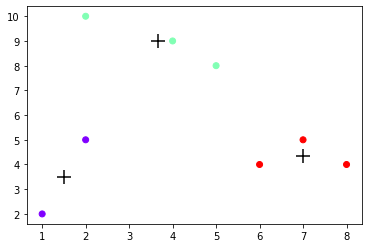

In [6]:
X = np.array([[2, 10], [2, 5], [8, 4],[5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
kmeans = KMeans(n_clusters=3).fit(X)
print("Labels: ", kmeans.labels_)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Predict Values: ", kmeans.predict([[1, 1]]))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',
marker="+", s=200)
plt.show()

Labels:  [3 2 1 3 0 3 0 3 0 0 3 0 0 0 3 1 3 0 3 1 1 2 2]
Cluster Centers:  [[ 4.125       4.        ]
 [ 5.25       24.        ]
 [22.33333333  8.        ]
 [ 3.75       10.125     ]]
Predict Values:  [0]


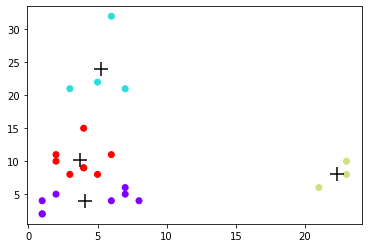

In [14]:
X = np.array([[4,9],[23,10],[3,21],[2,11],[1,4],[3,8],[1,2],[2, 10], [2, 5], [8, 4],[5, 8], [7, 5], [6, 4], [1, 2], [4, 9],[5,22],[6,11],[7,6],[4,15],[6,32],[7,21],[21,6],[23,8]])
kmeans = KMeans(n_clusters=4).fit(X)
print("Labels: ", kmeans.labels_)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Predict Values: ", kmeans.predict([[1, 1]]))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',
marker="+", s=200)
plt.show()

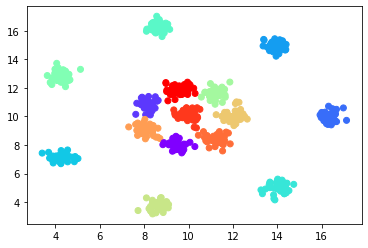

In [28]:
df = pd.read_csv("r15.csv")
training_points = df[["col1", "col2"]]
training_labels = df["target"]
kmeans = KMeans(n_clusters=15).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=kmeans.labels_,cmap='rainbow')
plt.show()

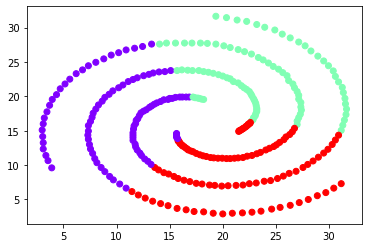

In [37]:
spiral = pd.read_csv('spiral.csv')
training_points = spiral[["X", "Y"]]
training_labels = spiral["Group"]
kmeans = KMeans(n_clusters=3).fit(training_points)
plt.scatter(training_points["X"], training_points["Y"], c=kmeans.labels_,cmap='rainbow')
plt.show()

## 안좋은 결과가 나옴 kmeans가 모든 군집화에 사용되는건아냐

# 병합 clustering

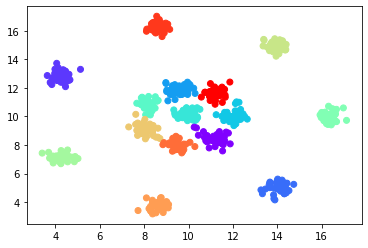

In [39]:
df = pd.read_csv("r15.csv")
training_points = df[["col1", "col2"]]
training_labels = df["target"]
agglo = AgglomerativeClustering(n_clusters=15).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"],
            c=agglo.labels_,cmap='rainbow')
plt.show()

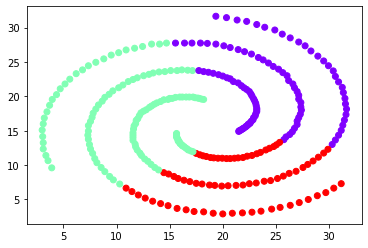

In [46]:
spiral = pd.read_csv('spiral.csv')
training_points = spiral[["X", "Y"]]
training_labels = spiral["Group"]
agglo = AgglomerativeClustering(n_clusters=3).fit(training_points)
plt.scatter(training_points["X"], training_points["Y"], c=agglo.labels_,cmap='rainbow')
plt.show()

##얘로 해도 문제가되네?

# DBSCAN clustering

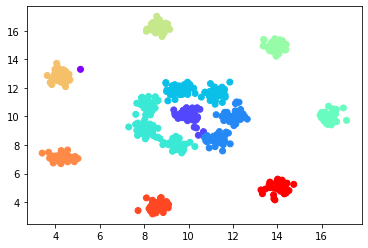

In [48]:
df = pd.read_csv("r15.csv")
training_points = df[["col1", "col2"]]
training_labels = df["target"]
dbscan = DBSCAN(eps=0.6,min_samples=10).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"],
            c=dbscan.labels_,cmap='rainbow')
plt.show()

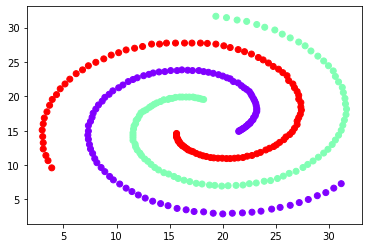

In [59]:
spiral = pd.read_csv('spiral.csv')
training_points = spiral[["X", "Y"]]
training_labels = spiral["Group"]
dbscan = DBSCAN(eps=2.1,min_samples=5).fit(training_points)
plt.scatter(training_points["X"], training_points["Y"], c=dbscan.labels_,cmap='rainbow')
plt.show()


In [60]:
#DBSCAN Method 실무에서 많이 쓰임

# 클러스터링 평가

### kmeans 조정랜드지수

In [64]:
df = pd.read_csv("r15.csv")
training_points = df[["col1", "col2"]]
training_labels = df["target"]
kmeans = KMeans(n_clusters=15).fit(training_points)
arc = adjusted_rand_score(training_labels, kmeans.labels_)
print(arc)

0.9927781994136302


### DBSCAN 조정랜드지수

In [65]:
spiral = pd.read_csv('spiral.csv')
training_points = spiral[["X", "Y"]]
training_labels = spiral["Group"]
dbscan = DBSCAN(eps=2.1,min_samples=5).fit(training_points)
arc = adjusted_rand_score(training_labels, dbscan.labels_)
print(arc)

1.0


# 최종